In [185]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px

df = pd.read_csv("evr12.csv")
df.columns = [ "number", "age", "gender", "area", "title", "specialization", "salary(rub)", "education_level",
             "working_experience", "language", "current_work", "skill_set", "skills"]

del df["skill_set"]
del df["skills"]
del df["area"]


df

,number,age,gender,title,specialization,salary(rub),education_level,working_experience,language,current_work
0,0,27.0,Женщина,Frontend-разработчик,"Программист, разработчик",NaN,Среднее специальное образование,NaN,"['Русский', 'Английский']",1
1,1,32.0,Male,"Frontend developer(React js , React native)","Programmer, developer",NaN,Higher education,0,"['Russian', 'English']",1
2,2,35.0,Мужчина,"Моушен дизайн, режиссер монтажа","Видеооператор, видеомонтажер",NaN,Высшее образование,7,"['Русский', 'Английский']",0
3,3,25.0,Мужчина,Менеджер по продажам(удаленно),Мастер-приемщик,NaN,Неоконченное высшее образование,NaN,"['Русский', 'Английский']",1
4,4,NaN,Мужчина,Инженер-строитель ПГС,"Прораб, мастер СМР",NaN,Высшее образование (Бакалавр),0,"['Кыргызский', 'Казахский', 'Русский', 'Турецк...",1
...,...,...,...,...,...,...,...,...,...,...
989,231,46.0,Male,Managing Director,"Sales manager, account manager",500000.0,Higher education (master),3,"['Russian', 'English', 'Turkish']",0
990,232,27.0,Мужчина,"Аналитика, Помощник бурильщика, кладовщик, дис...",Аналитик,NaN,Высшее образование,0,"['Казахский', 'Английский', 'Русский']",1
991,233,26.0,Мужчина,Начинающий специалист,Другое,NaN,Среднее специальное образование,0,"['Русский', 'Турецкий']",0
992,234,33.0,Женщина,Программный директор/продюсер,Руководитель проектов,NaN,Высшее образование,NaN,"['Русский', 'Английский', 'Китайский', 'Монгол...",0


In [138]:
df["age"].mean()

33.29886246122027

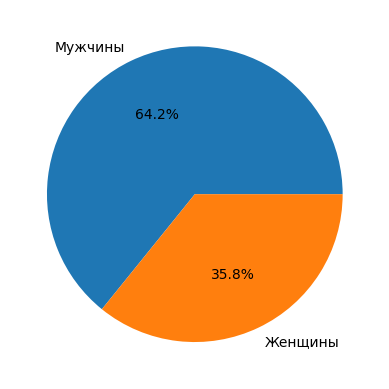

In [139]:
genders = df['gender'].value_counts()
gender_M = genders["Мужчина"] + genders["Male"]
gender_F = genders["Женщина"] + genders["Female"]
fig = plt.pie([gender_M,gender_F], labels=["Мужчины", 'Женщины'], autopct='%1.1f%%')

In [147]:
df["salary(rub)"].mean()

260909.0909090909

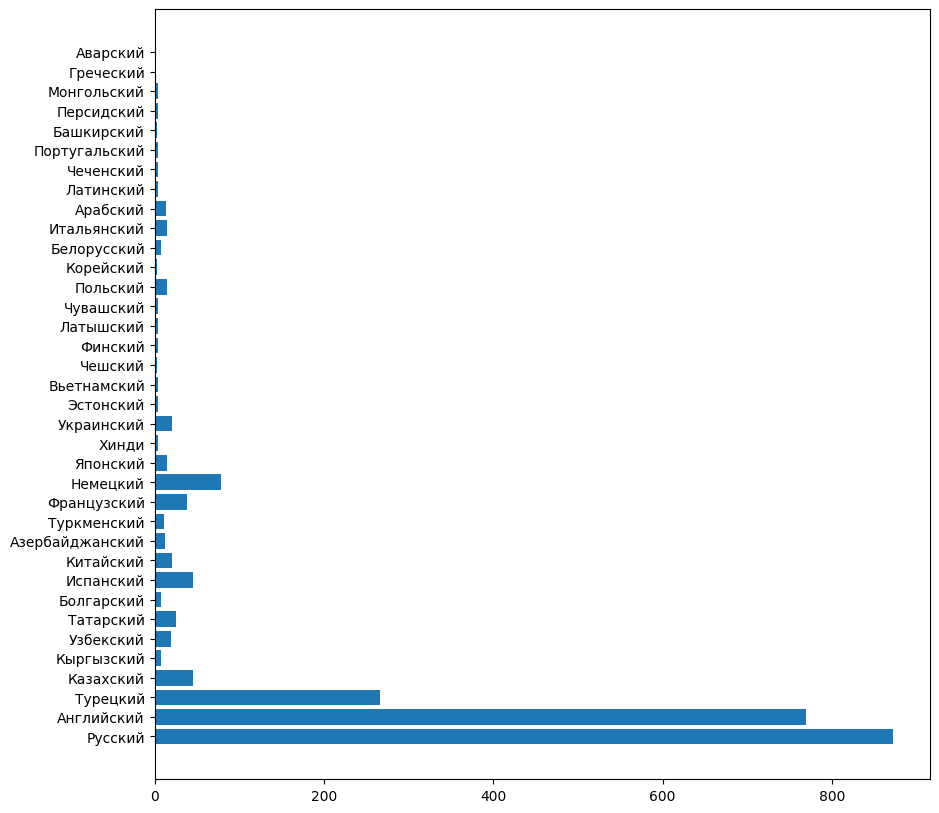

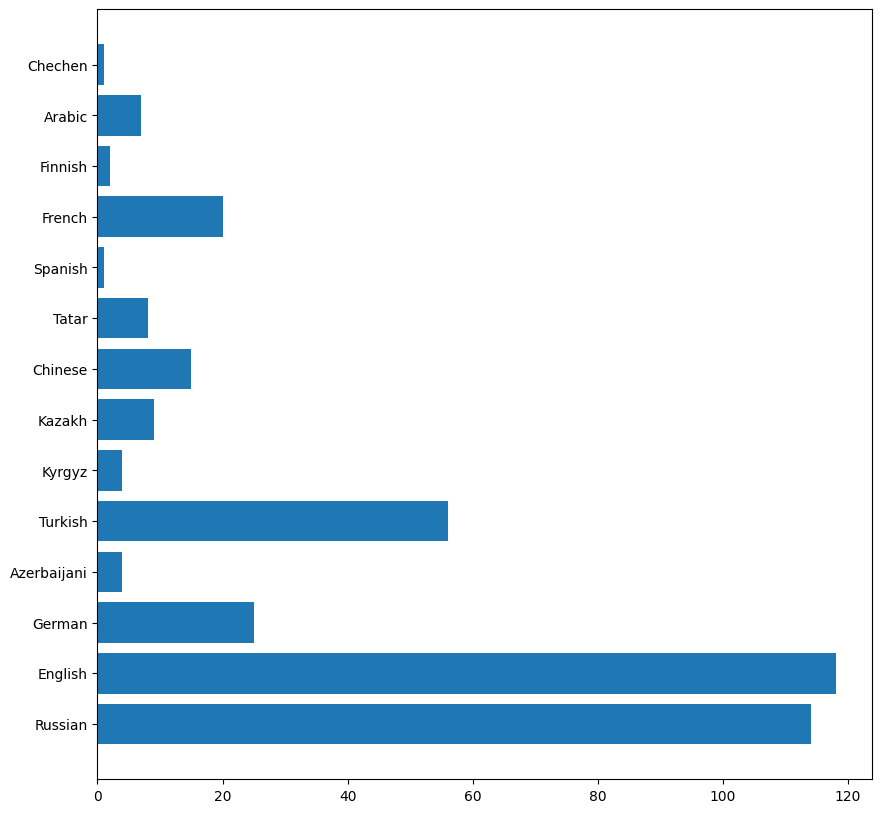

In [141]:
languages_ru = ['Башкирский', 'Чувашский', 'Китайский', 'Вьетнамский', 'Испанский', 'Турецкий', 'Польский', 'Азербайджанский', 'Немецкий', 'Финский', 'Белорусский', 'Персидский', 'Монгольский', 'Чеченский', 'Русский', 'Эстонский', 'Латинский', 'Туркменский', 'Хинди', 'Татарский', 'Греческий', 'Болгарский', 'Казахский', 'Чешский', 'Украинский', 'Английский', 'Корейский', 'Латышский', 'Кыргызский', 'Аварский', 'Французский', 'Узбекский', 'Итальянский', 'Арабский', 'Японский', 'Португальский']
languages_en = ['Arabic', 'Kazakh', 'Kyrgyz', 'German', 'Spanish', 'Tatar', 'Chinese', 'French', 'Finnish', 'Russian', 'English', 'Azerbaijani', 'Chechen', 'Turkish']

dict_lang_ru = {}
dict_lang_en = {}
for i in df["language"]:
    for j in languages_ru:
        if j in i:
            dict_lang_ru[j] = dict_lang_ru.get(j, 0) + 1

for i in df["language"]:
    for j in languages_en:
        if j in i:
            dict_lang_en[j] = dict_lang_en.get(j, 0) + 1

keys = list(dict_lang_ru.keys())

values = list(dict_lang_ru.values())


fig, ax = plt.subplots()
ax.barh(keys, values)


ax.set_yticks(keys, fontsize=20)



fig.set_figwidth(10)
fig.set_figheight(10)

plt.show()


keys = list(dict_lang_en.keys())

values = list(dict_lang_en.values())


fig, ax = plt.subplots()
ax.barh(keys, values)


ax.set_yticks(keys, fontsize=20)



fig.set_figwidth(10)
fig.set_figheight(10)

plt.show()


In [174]:
cnt = 0
summ = 0
for i in df["working_experience"]:
    if isinstance(i, str):
        if i != '[]':
            summ += int(i)
            cnt += 1

average_work_experience = summ / cnt

print(average_work_experience)
        

7.15962441314554


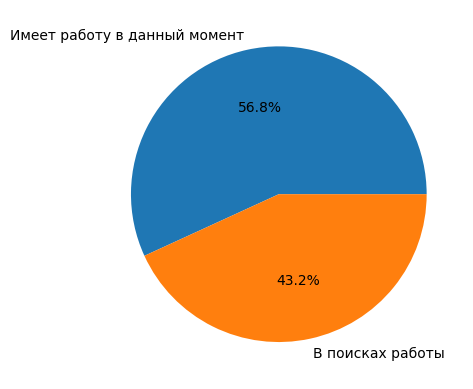

In [178]:
fig = plt.pie([df['current_work'].value_counts()[1], df['current_work'].value_counts()[0]], labels=["Имеет работу в данный момент", 'В поисках работы'], autopct='%1.1f%%')

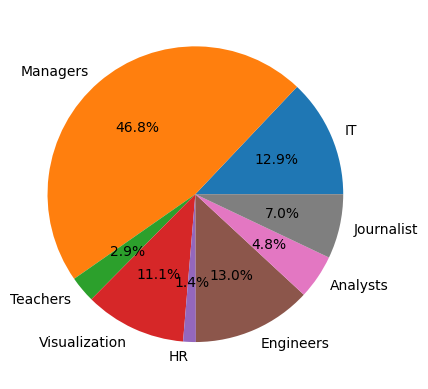

In [223]:
developers_key_words = ["разработчик", "Разработчик", "developer", 'Developer', "Data Analyst", "программист", 
                       "Программист", "DevOps", "python", "Python", "java", "Java", "C++", "backend",
                      "Backend", "frontend", "Frontend", "верстальщик", "Верстальщик", "ML", "data analyst", "data science", "Данные"]

managers_key_words = ["Managing", "Менеджер", "Manager", 'managing', 'менеджер', "manager", "Админ",
                     "админ", "Business", "business", "Бизнес", "бизнес", "Управление", "управление", "director", "Director",
                     'директор', 'Директор', "Marketing", "marketing", "маркетинг", "Маркетинг", "product",
                     "Product", "Начальник", "начальник", "Руководитель", "руководитель"]
engineers_key_words = ["Инженер" ,"Engineer", "инженер", "engineer"]
teachers_key_words = ["Учитель", "Преподаватель", "Педагог", "Репетитор", "учитель",
                     "преподаватель", "педагог", "репетитор", "Teacher", "teacher", "tutor", "Tutor"]

hr_key_words = ["HR", 'hr', "Персонал", 'персонал']

visulizations_key_words = ["3D", "3d", "2D", "2d", "Video", "video", "Photo", "photo", "дизайн", "Дизайн",
                          "фото", "Фото", "Видео", "видео", "Монтаж", "монтаж", "Art", 'art', "Artist", 'artist']

analysts_key_words = ["Analytics", "Analyst", "analytics", 'analyst', "Аналитик", "аналитик", 'финанс', 'Финанс']

journalist_key_words = ["Journalist", "journalist", "Журналист", "журналист", "Копирайтер","копирайтер",
                       "Редактор", "редактор", "Новостник", "новостник", "Репортёр", "репортёр", "переводчик",
                       "Переводчик", "Лингвист", "лингвист", "Content", "content"]

it_workers = []
manager_workers = []
teacher_workers = []
visualization_workers = []
hr_workers = []
analysts_workers = []
journalist_workers = []
engineers_workers = []


for i in df["title"]:
    unique_checker1 = 0
    unique_checker2 = 0
    unique_checker3 = 0
    unique_checker4 = 0
    unique_checker5 = 0
    unique_checker6 = 0
    unique_checker7 = 0
    unique_checker8 = 0
    for j in developer_key_words:
        if unique_checker1 == 0:
            if j in i:
                it_workers.append(i)
                unique_checker1 += 1
                
    for j in managers_key_words:
        if unique_checker2 == 0:
            if j in i:
                manager_workers.append(i)
                unique_checker2 += 1
                
    for j in teachers_key_words:
        if unique_checker3 == 0:
            if j in i:
                teacher_workers.append(i)
                unique_checker3 += 1
                
    for j in visulizations_key_words:
        if unique_checker4 == 0:
            if j in i:
                visualization_workers.append(i)
                unique_checker4 += 1
                
    for j in hr_key_words:
        if unique_checker5 == 0:
            if j in i:
                hr_workers.append(i)
                unique_checker5 += 1

    for j in analysts_key_words:
        if unique_checker6 == 0:
            if j in i:
                analysts_workers.append(i)
                unique_checker6 += 1 
                
    for j in journalist_key_words:
        if unique_checker7 == 0:
            if j in i:
                journalist_workers.append(i)
                unique_checker7 += 1 
                
                
    for j in engineers_key_words:
        if unique_checker8 == 0:
            if j in i:
                engineers_workers.append(i)
                unique_checker8 += 1 
spheres = []
spheres.append(len(it_workers))
spheres.append(len(manager_workers))
spheres.append(len(teacher_workers))
spheres.append(len(visualization_workers))
spheres.append(len(hr_workers))
spheres.append(len(engineers_workers))
spheres.append(len(analysts_workers))
spheres.append(len(journalist_workers))
fig1 = plt.pie(spheres, labels = ["IT", "Managers", "Teachers", "Visualization", "HR", "Engineers", "Analysts", "Journalist"], autopct='%1.1f%%')

